In [ ]:
!pip install -U transformers -q
!pip install -U accelerate -q
!pip install -U datasets -q
!pip install -U bertviz -q
!pip install -U umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━

In [ ]:
!sudo apt-get update -q
!sudo apt-get install nvidia-driver-470 -q

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,357 kB]
Fetched 3,510 kB in 2s (1,489 kB/s)
Reading package lists... Do

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
data = ["I love you", " I hate you"]
sentiment_pipeline(data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
ps

In [ ]:
df = pd.read_csv("/content/900_data - We_gpt.csv")
df = df[['Full Complaint','Complaint/Non Complaint']]

In [ ]:
df

,Full Complaint,Complaint/Non Complaint
0,Me and my sister got treatments from White den...,1
1,I have booked a diagnostic service on Netmeds....,1
2,"This is in regard to my ** year old Dad, Mr Ja...",1
3,"It is related to my fathers treatment, rather ...",1
4,In the initial conversation with Dr. Amrutha o...,1
...,...,...
871,Seamless Coordination Between Departments\n\nT...,0
872,I recently had the pleasure of undergoing a de...,0
873,"Starting with the seamless payment process, I ...",0
874,I appreciate the efficient handling of the ent...,0


In [ ]:
df["Full Complaint"][0]

'Me and my sister got treatments from White dental clinic, Indirapuram. I had a root canal treatment whose crown was not made properly that I had to change after going to Germany. I have the receipt for the same. Also, he did the fillings but didnt cleaned the underlying infection. Due to which, I had to get it done again from Germany.\n \n My sister, got treatment for multiple teeth. He put crown on all the teeth, that started having problem and as a result, I stopped going for further visits to this doctor. So, I had to go another doctor for correction of the treatment. Now we both published a review on google reviews that is a freedom of speech to tell people our honest reviews. They sent us an legal letter to remove the review and pay a huge compensation.'

In [ ]:


df['word_counts'] = df['Full Complaint'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['Full Complaint'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['Full Complaint'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['Full Complaint'].apply(lambda x: ps.get_stopwords_counts(x))


In [ ]:
sentiment_pipeline(df["Full Complaint"][871])

[{'label': 'POSITIVE', 'score': 0.9878425598144531}]

In [ ]:

df.head()

,Full Complaint,Complaint/Non Complaint,word_counts,char_counts,avg_wordlength,stopwords_counts
0,Me and my sister got treatments from White den...,1,141,623,4.418440,67
1,I have booked a diagnostic service on Netmeds....,1,72,342,4.750000,30
2,"This is in regard to my ** year old Dad, Mr Ja...",1,365,1718,4.706849,173
3,"It is related to my fathers treatment, rather ...",1,232,1081,4.659483,102
4,In the initial conversation with Dr. Amrutha o...,1,91,403,4.428571,45


In [ ]:
df['Full Complaint'] = df['Full Complaint'].str.lower()
df['Full Complaint'] = df['Full Complaint'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

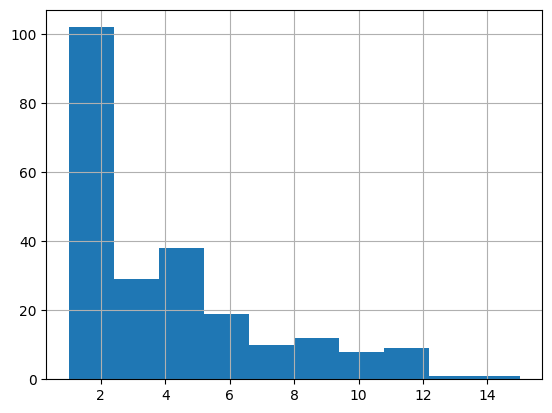

In [ ]:

df['word_counts'].value_counts().hist(bins=10)

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [ ]:

class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length",
                              max_length=self.max_len)

    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
X = df['Full Complaint'].tolist()
y = df['Complaint/Non Complaint'].tolist()

In [ ]:
dataset = CustomDataset(X, y, tokenizer)

In [ ]:
dataset

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:

from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)
  precision = precision_score(labels, preds)
  recall = recall_score(labels, preds)
  conf_matrix = confusion_matrix(labels, preds)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1, "precision":precision,"recall":recall, "conf_matrix":conf_matrix}

In [ ]:

from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_setiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 10,
    evaluation_strategy = 'epoch'
)

In [ ]:

trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Conf Matrix
1,No log,0.543570,0.715909,0.709431,0.695652,0.842105,[[46 35] [15 80]]
2,No log,0.428260,0.789773,0.786082,0.758929,0.894737,[[54 27] [10 85]]
3,No log,0.453563,0.789773,0.790078,0.837209,0.757895,[[67 14] [23 72]]
4,No log,0.516073,0.806818,0.805703,0.796117,0.863158,[[60 21] [13 82]]
5,No log,0.607552,0.795455,0.794274,0.786408,0.852632,[[59 22] [14 81]]
6,No log,0.678618,0.806818,0.806818,0.821053,0.821053,[[64 17] [17 78]]
7,No log,0.745344,0.818182,0.818182,0.831579,0.831579,[[65 16] [16 79]]


Trainer is attempting to log a value of "[[46 35]
 [15 80]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[54 27]
 [10 85]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[67 14]
 [23 72]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[60 21]
 [13 82]]" of type <class 'numpy.ndarray'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[59 22]
 [14 81]]" of type <class 'numpy.n

In [ ]:

trainer.save_model(model_name)


In [ ]:
df

In [ ]:
df["Full Complaint"][555]

In [ ]:


text = df["Full Complaint"][871]
pipe = pipeline('text-classification', model_name)
pipe(text)

In [ ]:

tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)


In [ ]:
id2label = {1: 'positive', 0: 'negative'}

In [ ]:

def get_prediction(text):
  input_ids = tok.encode(text, return_tensors='pt')
  output = mod(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = id2label[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [ ]:
df["Full Complaint"][700]

In [ ]:

text = df["Full Complaint"][700]
get_prediction("the doctors were very good")    #negative - Non Complaint; Positive - Complaint